In [1]:
from shapely.geometry import LineString, Point

In [9]:
l1 = LineString([(0,0),(1,0)])
l2 = LineString([(0,0),(1,1)])
l3 = LineString([(0,0),(0,1)])
l4 = LineString([(0,1),(0,0)])
l5 = LineString([(0,1),(1,1)])

In [176]:
import math
def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]
def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    # Get angle in radians and then convert to degrees
    angle = math.acos(dot_prod/magB/magA)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360

    if ang_deg-180>=0:
        return 360 - ang_deg
#         ang_deg = 360 - ang_deg
#     if ang_deg>90:
#         return 180-ang_deg
    return ang_deg

In [13]:
ang(l1.coords,l2.coords),ang(l1.coords,l3.coords),ang(l1.coords,l4.coords),ang(l2.coords,l4.coords),ang(l2.coords,l3.coords)

(45.00000000000001, 90.0, 90.0, 135.0, 45.00000000000001)

In [143]:
ldc = LineString([(-77.01239193659748, 38.9508361022552) , (-77.01234856964504, 38.95089366972041) , (-77.01223392367461, 38.95104574145057) , (-77.01204153978975, 38.95130682121423) , (-77.01194723815085, 38.951434764707194) , (-77.01168237327896, 38.9517941151788) , (-77.01153888919112, 38.951984744486694) , (-77.01141178287865, 38.95215366207694) , (-77.01134972955431, 38.95223996736828) , (-77.0113444239744, 38.9522479852457) , (-77.01134303993538, 38.952250237448105) , (-77.01133704255646, 38.95226077770855) , (-77.01133173741759, 38.95227158814972) , (-77.01132735523778, 38.952282578666605) , (-77.0113236652701, 38.952293659199015) , (-77.01132066754346, 38.952305009912386) , (-77.01131859274835, 38.952316360536265) , (-77.01131721018066, 38.952327891258555) , (-77.01131675053101, 38.95233933180869) , (-77.01131698309513, 38.95235086237454) ,])
losm = LineString([(-77.009007, 38.952407) , (-77.0095895, 38.9523932) , (-77.0106576, 38.9523583) , (-77.0113145, 38.9523389) , (-77.0124321, 38.9523077) ])

ldc1 = LineString([(-77.0090093127404, 38.952414931671896) , (-77.00915075208486, 38.95241293886451) , (-77.0091734792817, 38.9524125767521) , (-77.00949131351722, 38.95240453401328) , (-77.00959064456887, 38.95240154698228) , (-77.0098097243037, 38.952394958955786) , (-77.01012790423285, 38.952385112802894) , (-77.01042278019413, 38.95237652902243) , (-77.01045773686705, 38.95237553499021) , (-77.01066020369781, 38.952369300992785) ])

In [178]:
l = LineString([(38.920133, -77.031828),(38.921000, -77.031728),(38.921042, -77.029749),(38.920537, -77.029706 )])
# l = LineString([(38.919277, -77.031771 ),(38.919995, -77.031750 ),(38.920346, -77.029830 ),(38.919311, -77.029798 )])
sublosms = zip(l.coords[:-1],l.coords[1:])

for i in range(len(sublosms)-1):
    print ang(sublosms[i],sublosms[i+1])

82.2047670592
86.3488855898


In [150]:
gpdf = gp.GeoDataFrame([ldc,ldc1,losm],columns=['geometry'])
gpdf.crs = {'init': u'epsg:4326'}
gpdf = gpdf.to_crs(epsg=3559)

In [152]:
new_ldc, new_ldc1, new_losm = gpdf.geometry.values

In [157]:
sublosms = zip(new_losm.coords[:-1],new_losm.coords[1:])
subldcs = zip(new_ldc.coords[:-1],new_ldc.coords[1:])
subldcs1 = zip(new_ldc1.coords[:-1],new_ldc1.coords[1:])

In [170]:
for subl in sublosms:
    print LineString(subl).distance(new_ldc), LineString(subl).distance(new_ldc1)

423618.757232 423817.433411
423618.756255 423817.432434
423618.756255 423817.432434


In [169]:
for subl in subldcs:
    print LineString(subl).distance(new_losm), LineString(subl).distance(new_losm)
    

157.128693486 157.128693486
140.613250791 140.613250791
112.245417432 112.245417432
98.3436695161 98.3436695161
59.2982670942 59.2982670942
38.5945357412 38.5945357412
20.248725673 20.248725673
10.8663225879 10.8663225879
9.99326241158 9.99326241158
9.74769278917 9.74769278917
8.59694602199 8.59694602199
7.41408228262 7.41408228262
6.20838324426 6.20838324426
4.99055455617 4.99055455617
3.74060889851 3.74060889851
2.48781526744 2.48781526744
1.21289832177 1.21289832177
0.0 0.0
0.0548729309899 0.0548729309899


In [159]:
for subl in subldcs1:
    print LineString(subl).distance(new_losm), LineString(subl).distance(new_losm)

0.886161772577 0.886161772577
1.0368167761 1.0368167761
0.999473925373 0.999473925373
0.929722657626 0.929722657626
0.929928422915 0.929928422915
0.993100879967 0.993100879967
1.05409168273 1.05409168273
1.1707299001 1.1707299001
1.18717442937 1.18717442937


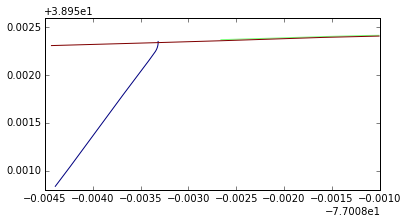

In [156]:
gpdf.to_crs(epsg=4326).plot()

In [77]:
def project_obj_on_line(obj, line):
    if len(obj.coords)==1:
        return shapely.geometry.Point(line.interpolate(line.project(obj)))
    narr = np.array([line.project(shapely.geometry.Point(x)) for x in obj.coords])
    return shapely.geometry.LineString([line.interpolate(x) for x in [narr.min(), narr.max()]])


In [78]:
sublosms = zip(losm.coords[:-1],losm.coords[1:])
subldcs = zip(ldc.coords[:-1],ldc.coords[1:])

In [80]:
import numpy as np
import shapely

In [81]:
for ln in l:
    lnstr = LineString(ln)
    proj_ln = project_obj_on_line(lnstr, ldc)
    print lnstr.length, proj_ln.length
    print ln, list(proj_ln.coords)

0.000582663444888 0.000580592756926
((-77.009007, 38.952407), (-77.0095895, 38.9523932)) [(-77.0090093127404, 38.952414931671896), (-77.00958975181337, 38.95240157382875)]
0.00106867002391 0.001068674366
((-77.0095895, 38.9523932), (-77.0106576, 38.9523583)) [(-77.00958975181337, 38.95240157382875), (-77.01065794086819, 38.9523693706658)]
0.000657186404298 2.2639019945e-06
((-77.0106576, 38.9523583), (-77.0113145, 38.9523389)) [(-77.01065794086819, 38.9523693706658), (-77.01066020369781, 38.952369300992785)]
0.00111803541983 0.0
((-77.0113145, 38.9523389), (-77.0124321, 38.9523077)) [(-77.01066020369781, 38.952369300992785), (-77.01066020369781, 38.952369300992785)]


In [82]:
for sublosm in sublosms:
    for subldc in subldcs:
        print ang(sublosm,subldc),
    print
    print 

0.549925149934 0.44432333575 0.0924104591685 0.365309683237 0.365303475133 0.41532606014 0.310258146837 0.271691138139 0.406452534729

1.06425022135 0.958648407168 0.421914612249 0.149015388182 0.149021596278 0.0989990112776 0.204066924575 0.242633933272 0.107872536691

0.884390158543 0.778788344362 0.242054549442 0.0308446746066 0.0308384665189 0.0808610515249 0.0242068617556 0.0627738704531 0.0719875261205

0.791894369365 0.686292555183 0.149558760263 0.123340463803 0.123334255703 0.173356840709 0.0682889274075 0.0297219186885 0.164483315298



In [83]:
for sublosm in sublosms:
    for subldc in subldcs:
        print ang(sublosm,subldc),
    print
    print 

0.549925149934 0.44432333575 0.0924104591685 0.365309683237 0.365303475133 0.41532606014 0.310258146837 0.271691138139 0.406452534729

1.06425022135 0.958648407168 0.421914612249 0.149015388182 0.149021596278 0.0989990112776 0.204066924575 0.242633933272 0.107872536691

0.884390158543 0.778788344362 0.242054549442 0.0308446746066 0.0308384665189 0.0808610515249 0.0242068617556 0.0627738704531 0.0719875261205

0.791894369365 0.686292555183 0.149558760263 0.123340463803 0.123334255703 0.173356840709 0.0682889274075 0.0297219186885 0.164483315298



In [116]:
def split_linestring_by_large_angle(to_split_line, ang_thres=4):
    new_lines = []
    from shapely.geometry import LineString
    from shapely.ops import linemerge
    ln_coords = to_split_line.coords if isinstance(to_split_line, LineString) else to_split_line
    sublns = zip(ln_coords[:-1],ln_coords[1:])
    new_line = [sublns[0]]
    for i in range(len(sublns)-1):
        print ang(sublns[i],sublns[i+1]) 
        if ang(sublns[i],sublns[i+1]) < ang_thres:
            new_line.append(sublns[i+1])
        else:
            new_lines.append(linemerge(new_line))
            new_line = [sublns[i+1]]
    new_lines.append(linemerge(new_line))
    return new_lines

In [117]:
import geopandas as gp 
%matplotlib inline


0.00772221013329
1.24450073576
2.22270233535
1.92150899627
1.93208888151
3.50062398455
4.40078929799
3.31988432299
3.62440936815
4.43524135424
3.52151559809
4.53654358875
3.45621095298


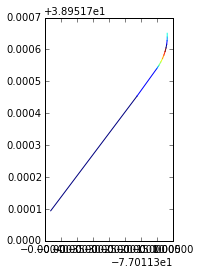

In [119]:
gp.GeoDataFrame(split_linestring_by_large_angle(ldc.coords[5:],ang_thres=1),columns=['geometry']).plot()

In [ ]:
(0,0),(0,1), (1,1)

In [120]:
sum([0.00772221013329,
1.24450073576,
2.22270233535,
1.92150899627,
1.93208888151,
3.50062398455,
4.40078929799,
3.31988432299,
3.62440936815,
4.43524135424,
3.52151559809,
4.53654358875,
3.45621095298,])

38.12374162676329

In [124]:
ang(ldc.coords[5:7],ldc.coords[-2:])

38.12374162677848

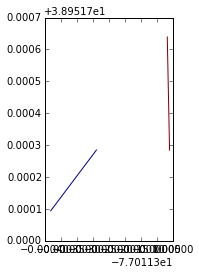

In [135]:
gp.GeoDataFrame([LineString(ldc.coords[5:7]),LineString([(-77.01131675053101, 38.95233933180869), (-77.01130959873211, 38.951984744486694)])],columns=['geometry']).plot()

In [131]:
ldc.coords[5:7]

[(-77.01168237327896, 38.9517941151788),
 (-77.01153888919112, 38.951984744486694)]

In [128]:
(x1,y1), (x2,y2) = ldc.coords[-2:]

In [130]:
x1-x2, y1-y2

(2.3256411907368602e-07, -1.1530565849682262e-05)

In [133]:
y = 38.951984744486694
x = (x2-x1)*(y-y1)/(y2-y1)+x1
print x

-77.0113095987


In [134]:
(x1,y1),(x,y)

((-77.01131675053101, 38.95233933180869),
 (-77.01130959873211, 38.951984744486694))

In [ ]:
[(-77.01131675053101, 38.95233933180869), (-77.01130959873211, 38.951984744486694)]